## L1: La significancia estadística y los intervalos de confianza 
# Author: 

De acuerdo con nuestro caso de proyecto de Airbnb, queremos inferir o comprobar si la hipótesis de diferencias de precios entre habitaciones de 2 cuartos en la zona central oeste y central norte son significativas. 

### Objetivos
1. Construir un intervalo de confianza
2. Aplicar la validación de hipótesis
3. Aplicar un p-test para la comparación de muestras


### 1. Contexto del caso
La organización Airbnb ha visto que los barrios centrales Centrum-Oost y Centrum-West, a pesar de ser centro, tienen unos cambios de precios que tienden a variar la catidad de reservas de una zona a otra. Airbnb te solicita identificar si las diferencias de precios que se ven entre la zona central-oriental (Centrum-Oost) y la zona central-occidental(Centrum-West) son significativas. Ellos tienen especial foco en comparar apartamentos de 2 alcobas. 

### 2. Importación de librerías y archivos
En las siguientes líneas de código se importaran los materiales de trabajo necesarios para desarrollar el caso de uso, en esto se incluyen las *librerías y los datos*

In [11]:
# Importar las librerías necesarias según el análisis que se vaya a realizar
# Librería para comando de sistema
import os
# Librería para manejo de datos
import pandas as pd
#librería para cálculos numéricos
import numpy as np
# Calcular el test estadístico
from statsmodels.stats import weightstats as stests
#librería para graficar
import matplotlib.pyplot as plt

In [12]:
# cargar los datos en csv
data= pd.read_csv('listings_m2.csv', sep=';',encoding='latin-1', low_memory=False)

Es importante tener en cuenta la visualización de los datos porque además de contexto se puede entender mucho mejor de qué se está hablando y qué tipos de datos se han cargado desde la máquina

In [13]:
#visualizar los primeros registros
data.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,"2,02104E+13",12/04/2021,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.90
1,20168,https://www.airbnb.com/rooms/20168,"2,02104E+13",12/04/2021,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.50
2,25428,https://www.airbnb.com/rooms/25428,"2,02104E+13",11/04/2021,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,2,2,0,0,0.13
3,27886,https://www.airbnb.com/rooms/27886,"2,02104E+13",11/04/2021,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,0363 974D 4986 7411 88D8,t,1,0,1,0,1.94
4,28871,https://www.airbnb.com/rooms/28871,"2,02104E+13",13/04/2021,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.59


### 3. Intervalo de confianza
El intervalo de confianza (IC) es esencial en las estadísticas y muy importante para los científicos de datos. 
Como suena, el intervalo de confianza es un rango de valores. En condiciones ideales, debe contener la mejor estimación de un parámetro estadístico. Se expresa como porcentaje. El intervalo de confianza del 95% es el más común. Puede utilizar otros valores como 97%, 90%, 75% o incluso 99% de intervalo de confianza si su investigación lo exige.

En las siguientes líneas vamos a calcular el intervalo de confianza para el valor de flete medio de todos los envíos

Primero obtener los valores necesarios para su cálculo:
* 𝑋=𝑀𝑒𝑑𝑖𝑎 𝑑𝑒 𝑙𝑎 𝑚𝑢𝑒𝑠𝑡𝑟𝑎 
* 𝛼=𝑆𝑖𝑔𝑛𝑖𝑓𝑖𝑐𝑎𝑛𝑐𝑖𝑎
* 𝜎=𝐷𝑒𝑠𝑣𝑖𝑎𝑐𝑖ó𝑛 𝐸𝑠𝑡𝑎𝑛𝑑𝑎𝑟
* 𝑛=𝑇𝑎𝑚𝑎ñ𝑜 𝑑𝑒 𝑙𝑎 𝑚𝑢𝑒𝑠𝑡𝑟𝑎 
* 𝑧=𝑉𝑎𝑙𝑜𝑟 𝑑𝑒 𝑧𝑇𝑒𝑠𝑡

In [15]:
#Media de la muestra
x=data['price'].mean()
#significancia
alpha=0.05 #para tener el 95% de confianza
# Desviación estándar
sigma=data['price'].std()
# Tamaño de la muestra
n=len(data['price'])
#Valor del test 
z=1.96

#error estándar
error_estandar = sigma /np.sqrt(n)
#cálculo intervalos de confianza
limite_inferior = x - z* error_estandar  
limite_superior = x + z* error_estandar
#Almacenar los dos límites del intervalo
intervalo=[limite_inferior, limite_superior]
intervalo

[152.23269065972573, 156.75906249595448]

### 5. Z-test
Te recomendamos utilizar el Z-Test en tus pruebas

<AxesSubplot:xlabel='neighbourhood_cleansed'>

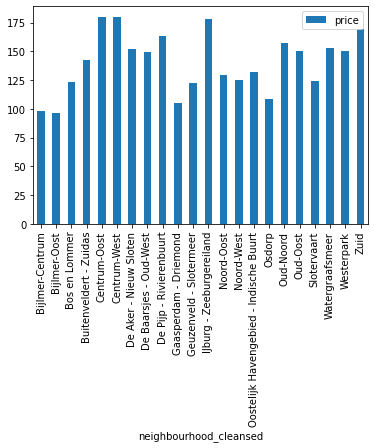

In [16]:
# Elegir las zonas
data_price=data.groupby('neighbourhood_cleansed').mean().reset_index()[['neighbourhood_cleansed','price']]
#graficar las zonas por promedios
data_price.plot.bar(x='neighbourhood_cleansed', y='price')

In [18]:
#Mostrar promedio de Centrum-Oost y Centrum-West,
price_CO=data[data['neighbourhood_cleansed']=='Centrum-Oost']['price']
price_CW=data[data['neighbourhood_cleansed']=='Centrum-West']['price']
print('Promedio CO: '+str(price_CO.mean()))
print('Promedio CW: '+str(price_CW.mean()))

Promedio CO: 180.0241610738255
Promedio CW: 179.62563067608477


In [19]:
# Valores de z y p
ztest ,pval1 = stests.ztest(price_CO, x2=price_CW, value=0,alternative='two-sided')
print('Valor de z: '+str(ztest))
print('Valor p: '+ str(pval1))

Valor de z: 0.06120701278442445
Valor p: 0.9511943448120572


In [20]:
# Regla de decisión si el p valor es menor que la significancia escogida 
confianza=0.95
significancia=1-confianza
# Si se tiene menor valor se rechaza la hipótesis nula
if pval1<significancia:
    print("Rechazar hipótesis nula")
else:
    print("No rechazar hipótesis nula")

No rechazar hipótesis nula


Por lo tanto podemos inferir con un nivel de confianza del 95% que los promedios del valor de habitacion entre estas dos zonas para apartamentos de dos alcobas es estadíticamente similar.